### Here I will get different data Using APIs and Web Scraping tools.

#### 1- Getting Data by Using API

In [15]:
# in this part I would like to see how GDP per capita has changed overtime for 4 Asian 
# countries relative to the United States and the world level of GDP per capita from 1960 to 2019. 
# I choose Japan, China, India and South Korea as they are sited as top economies in Asia.
# The data is comming from World Bank


# import pandas-datareader and other packages
import pandas_datareader.data as web
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import datetime
import matplotlib.pyplot as plt
from pandas_datareader import wb
%matplotlib inline
%matplotlib notebook

ind = "NY.GDP.PCAP.CD"
cons = ["CHN", "IND", "USA", "JPN", "KR", "WLD"]
st = 1960
ed = 2019
data = wb.download(indicator=ind, country=cons, start=st, end=ed).dropna()

# Renaming the variable names
data = data.rename(columns={'NY.GDP.PCAP.CD':'GDP perCapita'})

#data.reset_index(inplace=True)
#data=data.pivot(index='year', columns='country', values='GDP perCapita')
    
data.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas_datareader\wb.py:593: UserWarning: Non-standard ISO country codes: WLD
  "Non-standard ISO " "country codes: %s" % tmp, UserWarning


GDP perCapita
country year               
China   2018    9770.847088
        2017    8759.041578
        2016    8078.790474
        2015    8033.388043
        2014    7651.366044

<IPython.core.display.Javascript object>


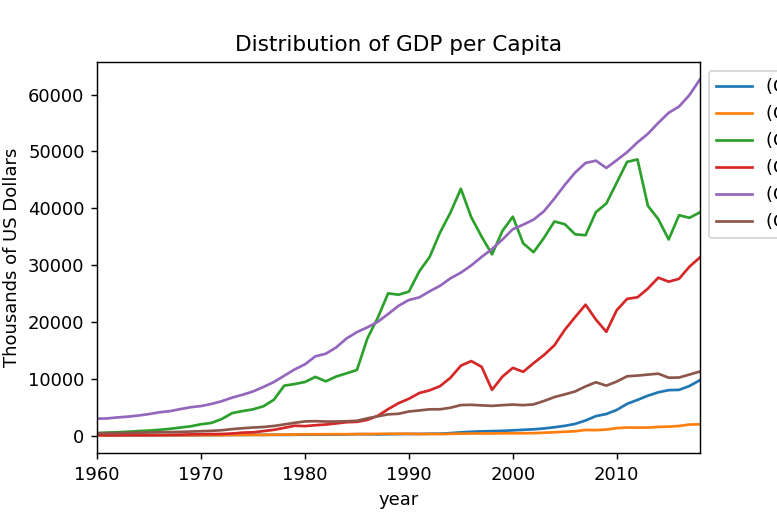

<IPython.core.display.Javascript object>


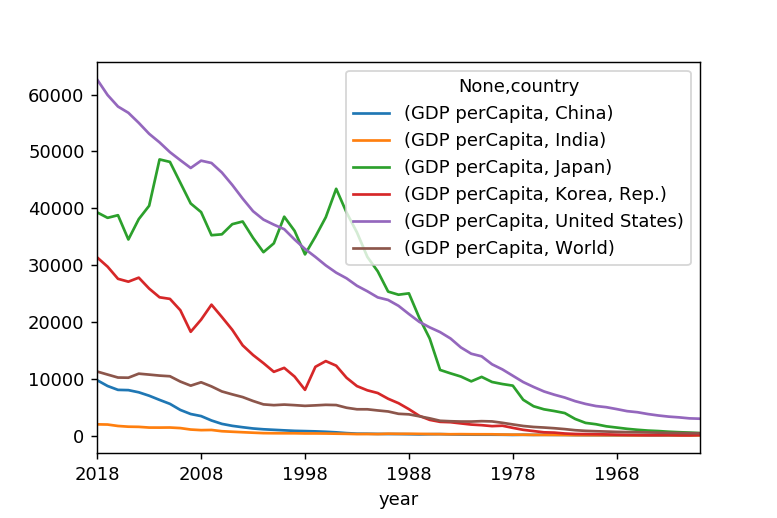

In [16]:
#data is "pivoted", pandas' unstack fucntion helps reshape it into something plottable
data1 = data.unstack(level=0)
data1.sort_index().plot()  #you can change x 
plt.legend(loc=2,bbox_to_anchor=(1.0,1.0)) #include a legend
plt.title("Distribution of GDP per Capita") 
plt.xlabel('year'); plt.ylabel('Thousands of US Dollars')
data1.plot()
plt.show()
plt.savefig('Distribution of GDP per Capita.png')

#### 2- Getting Data by Web Scraping

Ali Daei is the all-time men's top goalscorer and a former Iranian football player who holds the record for the most goals in international men's football, with 109 goals in 149 appearances.
I want to scrape the number of his intrnational goals and the games that he scored on them.  

In [17]:
# import packages
from bs4 import BeautifulSoup
import urllib.request

# give URL and header
wiki = "https://en.wikipedia.org/wiki/List_of_international_goals_scored_by_Ali_Daei"
header = {'User-Agent': 'Google Chrome'} #Needed to prevent 403 error on Wikipedia

# Make the request to get served the webpage, "soupify" it
req = urllib.request.Request(wiki, headers=header)
page = urllib.request.urlopen(req)
soup = BeautifulSoup(page, 'lxml')
 
# what does the soup object contain
print(soup.prettify())
# print(page)

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of international goals scored by Ali Daei - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgMonthNamesShort":["","Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"],"wgRequestId":"XcV2fApAIC8AAFiCgBQAAACJ","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_international_goals_scored_by_Ali_Daei","wgTitle":"List of international goals scored by Ali Daei","wgCurRevisionId":921384360,"wgRevisionId":921384360,"wgArticleId":47224183,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgU

In [18]:
# extract the table by pulling information from the wikitable class
table = soup.find_all("table", {"class": "wikitable"})[0] # Grab the first table
print(table)

<table class="wikitable sortable" style="">
<tbody><tr>
<th>#</th>
<th>Date</th>
<th>Venue</th>
<th>Opponent
</th>
<th>Score</th>
<th>Result</th>
<th>Competition
</th></tr>
<tr>
<td>1</td>
<td>25 June 1993</td>
<td><a href="/wiki/Tehran" title="Tehran">Tehran</a>, <a href="/wiki/Iran" title="Iran">Iran</a></td>
<td><span style="white-space:nowrap"><span class="flagicon"><img alt="" class="thumbborder" data-file-height="600" data-file-width="900" decoding="async" height="15" src="//upload.wikimedia.org/wikipedia/commons/thumb/3/33/Flag_of_Chinese_Taipei_%28FIFA%29.svg/23px-Flag_of_Chinese_Taipei_%28FIFA%29.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/3/33/Flag_of_Chinese_Taipei_%28FIFA%29.svg/35px-Flag_of_Chinese_Taipei_%28FIFA%29.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/3/33/Flag_of_Chinese_Taipei_%28FIFA%29.svg/45px-Flag_of_Chinese_Taipei_%28FIFA%29.svg.png 2x" width="23"/> </span><a href="/wiki/Chinese_Taipei_national_football_team" title="Chine

In [19]:
# containing the element in each row in that column
goals = {'#':[], 'Date': [], 'Venue': [], 'Opponent': [],'Score': [], 'Result': [], 'Competition': []}

# iterate through the table, pulling out each row

for row in table.findAll("tr"):
    cells = row.findAll("td")
    print(cells)
    #For each "tr", assign each "td" to a variable.
    if len(cells) == 7:
        goals['#'].append(cells[0].findAll(text=True))
        goals['Date'].append(cells[1].findAll(text=True))
        goals['Venue'].append(cells[2].findAll(text=True))
        goals['Opponent'].append(cells[3].find(text=True))
        goals['Score'].append(cells[4].find(text=True))
        goals['Result'].append(cells[5].find(text=True))
        goals['Competition'].append(cells[6].findAll(text=True))

[]
[<td>1</td>, <td>25 June 1993</td>, <td><a href="/wiki/Tehran" title="Tehran">Tehran</a>, <a href="/wiki/Iran" title="Iran">Iran</a></td>, <td><span style="white-space:nowrap"><span class="flagicon"><img alt="" class="thumbborder" data-file-height="600" data-file-width="900" decoding="async" height="15" src="//upload.wikimedia.org/wikipedia/commons/thumb/3/33/Flag_of_Chinese_Taipei_%28FIFA%29.svg/23px-Flag_of_Chinese_Taipei_%28FIFA%29.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/3/33/Flag_of_Chinese_Taipei_%28FIFA%29.svg/35px-Flag_of_Chinese_Taipei_%28FIFA%29.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/3/33/Flag_of_Chinese_Taipei_%28FIFA%29.svg/45px-Flag_of_Chinese_Taipei_%28FIFA%29.svg.png 2x" width="23"/> </span><a href="/wiki/Chinese_Taipei_national_football_team" title="Chinese Taipei national football team">Chinese Taipei</a></span>
</td>, <td><b>3</b>–0</td>, <td><b>6</b>–0</td>, <td><a href="/wiki/1994_FIFA_World_Cup_qualification_(AFC)#Gro

In [20]:
# Look at this dictionary
goals

{'#': [['1'],
  ['2'],
  ['4'],
  ['5'],
  ['6'],
  ['8'],
  ['10'],
  ['14'],
  ['19'],
  ['20'],
  ['21'],
  ['22'],
  ['23'],
  ['24'],
  ['25'],
  ['29'],
  ['30'],
  ['32'],
  ['33'],
  ['34'],
  ['36'],
  ['37'],
  ['38'],
  ['39'],
  ['41'],
  ['42'],
  ['44'],
  ['45'],
  ['48'],
  ['49'],
  ['50'],
  ['51'],
  ['52'],
  ['55'],
  ['56'],
  ['57'],
  ['58'],
  ['59'],
  ['60'],
  ['62'],
  ['63'],
  ['64'],
  ['65'],
  ['69'],
  ['70'],
  ['71'],
  ['72'],
  ['74'],
  ['76'],
  ['77'],
  ['78'],
  ['79'],
  ['80'],
  ['81'],
  ['82'],
  ['84'],
  ['85'],
  ['86'],
  ['87'],
  ['88'],
  ['90'],
  ['93'],
  ['94'],
  ['95'],
  ['96'],
  ['98'],
  ['99'],
  ['103'],
  ['104'],
  ['105'],
  ['106'],
  ['107'],
  ['108'],
  ['109']],
 'Date': [['25 June 1993'],
  ['4 July 1993'],
  ['18 October 1993'],
  ['22 October 1993'],
  ['25 October 1993'],
  ['30 May 1996'],
  ['10 June 1996'],
  ['12 June 1996'],
  ['14 June 1996'],
  ['19 June 1996'],
  ['21 June 1996'],
  ['5 December 199

In [21]:
# put this in a dataframe and format it
import pandas as pd

goals_data = pd.DataFrame(goals)
goals_data

# this table shows the information about the games that Ali played in them.

,#,Date,Venue,Opponent,Score,Result,Competition
0,[1],[25 June 1993],"[Tehran, , , Iran]",,3,6,"[1994 FIFA World Cup Qualification, ]"
1,[2],[4 July 1993],"[Damascus, , , Syria]",,3,6,"[1994 FIFA World Cup Qualification, ]"
2,[4],[18 October 1993],"[Doha, , , Qatar]",,2,2,"[1994 FIFA World Cup Qualification, ]"
3,[5],[22 October 1993],"[Doha, , , Qatar]",,1,1,"[1994 FIFA World Cup Qualification, ]"
4,[6],[25 October 1993],"[Doha, , , Qatar]",,1,2,"[1994 FIFA World Cup Qualification, ]"
5,[8],[30 May 1996],"[Kuwait City, , , Kuwait]",,1,2,"[International Match, ]"
6,[10],[10 June 1996],"[Tehran, , , Iran]",,2,8,"[1996 AFC Asian Cup Qualification, ]"
7,[14],[12 June 1996],"[Tehran, , , Iran]",,1,7,"[1996 AFC Asian Cup Qualification, ]"
8,[19],[14 June 1996],"[Tehran, , , Iran]",,1,2,"[1996 AFC Asian Cup Qualification, ]"
9,[20],[19 June 1996],"[Muscat, , , Oman]",,1,4,"[1996 AFC Asian Cup Qualification, ]"


In [22]:
df= goals_data.drop(['#', 'Opponent'], axis=1)
df

,Date,Venue,Score,Result,Competition
0,[25 June 1993],"[Tehran, , , Iran]",3,6,"[1994 FIFA World Cup Qualification, ]"
1,[4 July 1993],"[Damascus, , , Syria]",3,6,"[1994 FIFA World Cup Qualification, ]"
2,[18 October 1993],"[Doha, , , Qatar]",2,2,"[1994 FIFA World Cup Qualification, ]"
3,[22 October 1993],"[Doha, , , Qatar]",1,1,"[1994 FIFA World Cup Qualification, ]"
4,[25 October 1993],"[Doha, , , Qatar]",1,2,"[1994 FIFA World Cup Qualification, ]"
5,[30 May 1996],"[Kuwait City, , , Kuwait]",1,2,"[International Match, ]"
6,[10 June 1996],"[Tehran, , , Iran]",2,8,"[1996 AFC Asian Cup Qualification, ]"
7,[12 June 1996],"[Tehran, , , Iran]",1,7,"[1996 AFC Asian Cup Qualification, ]"
8,[14 June 1996],"[Tehran, , , Iran]",1,2,"[1996 AFC Asian Cup Qualification, ]"
9,[19 June 1996],"[Muscat, , , Oman]",1,4,"[1996 AFC Asian Cup Qualification, ]"


In [23]:
df = df.astype('str')
df.Date = df.Date.str.strip('[').str.strip(']').str.strip("''")
df.Venue = df.Venue.str.strip('[').str.strip(']').str.strip("''")
df.Score = df.Score.str.strip('[').str.strip(']').str.strip("''")
df.Result = df.Result.str.strip("''")
df.Result = df.Result.str.strip("''")
df.Competition = df.Competition.str.strip('[').str.strip(']').str.strip("''").str.strip("'").str.strip(",").str.strip(r'\n')
print(df)

                 Date                                      Venue Score Result  \
0        25 June 1993                       Tehran', ', ', 'Iran     3      6   
1         4 July 1993                    Damascus', ', ', 'Syria     3      6   
2     18 October 1993                        Doha', ', ', 'Qatar     2      2   
3     22 October 1993                        Doha', ', ', 'Qatar     1      1   
4     25 October 1993                        Doha', ', ', 'Qatar     1      2   
5         30 May 1996                Kuwait City', ', ', 'Kuwait     1      2   
6        10 June 1996                       Tehran', ', ', 'Iran     2      8   
7        12 June 1996                       Tehran', ', ', 'Iran     1      7   
8        14 June 1996                       Tehran', ', ', 'Iran     1      2   
9        19 June 1996                       Muscat', ', ', 'Oman     1      4   
10       21 June 1996                       Muscat', ', ', 'Oman     1      2   
11    5 December 1996       

In [24]:
df.to_excel("output.xlsx")  

In [25]:
# extract the table by pulling information from the wikitable class
# I am trying to get data from second table
# this table will show his goals by year
table = soup.find_all("table", {"class": "wikitable"})[1] # Grab the second table
print(table)

<table class="wikitable plainrowheaders sortable" style="text-align:center;font-size:95%">
<caption>Goals by year
</caption>
<tbody><tr>
<th>Year</th>
<th>Apps</th>
<th>Goals
</th></tr>
<tr>
<td>1993</td>
<td>16</td>
<td>7
</td></tr>
<tr>
<td>1994</td>
<td>1</td>
<td>0
</td></tr>
<tr>
<td>1995</td>
<td>0</td>
<td>0
</td></tr>
<tr>
<td>1996</td>
<td>18</td>
<td>22
</td></tr>
<tr>
<td>1997</td>
<td>17</td>
<td>9
</td></tr>
<tr>
<td>1998</td>
<td>13</td>
<td>9
</td></tr>
<tr>
<td>1999</td>
<td>5</td>
<td>2
</td></tr>
<tr>
<td>2000</td>
<td>19</td>
<td>20
</td></tr>
<tr>
<td>2001</td>
<td>16</td>
<td>10
</td></tr>
<tr>
<td>2002</td>
<td>4</td>
<td>2
</td></tr>
<tr>
<td>2003</td>
<td>9</td>
<td>5
</td></tr>
<tr>
<td>2004</td>
<td>16</td>
<td>17
</td></tr>
<tr>
<td>2005</td>
<td>9</td>
<td>4
</td></tr>
<tr>
<td>2006</td>
<td>6</td>
<td>2
</td></tr>
<tr>
<th>Total</th>
<th>149</th>
<th>109
</th></tr></tbody></table>


In [26]:
# containing the element in each row in that column
goals_by_year = {'Year':[], 'Apps': [], 'Goals': []}

# iterate through the table, pulling out each row

for row in table.findAll("tr"):
    cells = row.findAll("td")
    print(cells)
    #For each "tr", assign each "td" to a variable.
    if len(cells) == 3:
        goals_by_year['Year'].append(cells[0].findAll(text=True))
        goals_by_year['Apps'].append(cells[1].findAll(text=True))
        goals_by_year['Goals'].append(cells[2].findAll(text=True))

[]
[<td>1993</td>, <td>16</td>, <td>7
</td>]
[<td>1994</td>, <td>1</td>, <td>0
</td>]
[<td>1995</td>, <td>0</td>, <td>0
</td>]
[<td>1996</td>, <td>18</td>, <td>22
</td>]
[<td>1997</td>, <td>17</td>, <td>9
</td>]
[<td>1998</td>, <td>13</td>, <td>9
</td>]
[<td>1999</td>, <td>5</td>, <td>2
</td>]
[<td>2000</td>, <td>19</td>, <td>20
</td>]
[<td>2001</td>, <td>16</td>, <td>10
</td>]
[<td>2002</td>, <td>4</td>, <td>2
</td>]
[<td>2003</td>, <td>9</td>, <td>5
</td>]
[<td>2004</td>, <td>16</td>, <td>17
</td>]
[<td>2005</td>, <td>9</td>, <td>4
</td>]
[<td>2006</td>, <td>6</td>, <td>2
</td>]
[]


In [27]:
# Look at this dictionary

goals_by_year


{'Year': [['1993'],
  ['1994'],
  ['1995'],
  ['1996'],
  ['1997'],
  ['1998'],
  ['1999'],
  ['2000'],
  ['2001'],
  ['2002'],
  ['2003'],
  ['2004'],
  ['2005'],
  ['2006']],
 'Apps': [['16'],
  ['1'],
  ['0'],
  ['18'],
  ['17'],
  ['13'],
  ['5'],
  ['19'],
  ['16'],
  ['4'],
  ['9'],
  ['16'],
  ['9'],
  ['6']],
 'Goals': [['7\n'],
  ['0\n'],
  ['0\n'],
  ['22\n'],
  ['9\n'],
  ['9\n'],
  ['2\n'],
  ['20\n'],
  ['10\n'],
  ['2\n'],
  ['5\n'],
  ['17\n'],
  ['4\n'],
  ['2\n']]}

In [28]:
# put this in a dataframe and format it
import pandas as pd

goals_by_year_data = pd.DataFrame(goals_by_year)

goals_by_year_data

# this table will show his goals by year

,Year,Apps,Goals
0,[1993],[16],[7 ]
1,[1994],[1],[0 ]
2,[1995],[0],[0 ]
3,[1996],[18],[22 ]
4,[1997],[17],[9 ]
5,[1998],[13],[9 ]
6,[1999],[5],[2 ]
7,[2000],[19],[20 ]
8,[2001],[16],[10 ]
9,[2002],[4],[2 ]


In [52]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import polyfit

goals_by_year_data = goals_by_year_data.astype('str')
# goals_by_year_data.replace(to_replace=[r"['", r"']",r"\n"], value=None, regex=True, inplace=True)#.astype(float)
goals_by_year_data.Goals = goals_by_year_data.Goals.str.strip('[').str.strip(']').str.strip("''").str.strip(r'\n')
goals_by_year_data.Year = goals_by_year_data.Year.str.strip('[').str.strip(']').str.strip("''") 
goals_by_year_data.Apps = goals_by_year_data.Apps.str.strip('[').str.strip(']').str.strip("''")
goals_by_year_data = goals_by_year_data.astype('float')
goals_by_year_data.to_excel("output1.xlsx")  
print(goals_by_year_data)

      Year  Apps  Goals
0   1993.0  16.0    7.0
1   1994.0   1.0    0.0
2   1995.0   0.0    0.0
3   1996.0  18.0   22.0
4   1997.0  17.0    9.0
5   1998.0  13.0    9.0
6   1999.0   5.0    2.0
7   2000.0  19.0   20.0
8   2001.0  16.0   10.0
9   2002.0   4.0    2.0
10  2003.0   9.0    5.0
11  2004.0  16.0   17.0
12  2005.0   9.0    4.0
13  2006.0   6.0    2.0


In [53]:
# I am trying to get data from forth table
# # this table will show his goals by opposition
table = soup.find_all("table", {"class": "wikitable"})[3] # Grab the second table
print(table)

<table class="wikitable plainrowheaders sortable" style="text-align:center;font-size:95%">
<caption>Goals by opposition
</caption>
<tbody><tr>
<th scope="col">Opposition
</th>
<th scope="col">Goals
</th></tr>
<tr>
<td style="text-align:left"><span style="white-space:nowrap"><span class="flagicon"><img alt="" class="thumbborder" data-file-height="480" data-file-width="720" decoding="async" height="15" src="//upload.wikimedia.org/wikipedia/commons/thumb/0/0f/Flag_of_Maldives.svg/23px-Flag_of_Maldives.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/0/0f/Flag_of_Maldives.svg/35px-Flag_of_Maldives.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/0/0f/Flag_of_Maldives.svg/45px-Flag_of_Maldives.svg.png 2x" width="23"/> </span><a href="/wiki/Maldives_national_football_team" title="Maldives national football team">Maldives</a></span></td>
<td>8
</td></tr>
<tr>
<td style="text-align:left"><span style="white-space:nowrap"><span class="flagicon"><img alt="" class="thumb

In [54]:
# containing the element in each row in that column
goals_by_opposition = {'Opposition':[], 'Goals': []}

# iterate through the table, pulling out each row

for row in table.findAll("tr"):
    cells = row.findAll("td")
    print(cells)
    #For each "tr", assign each "td" to a variable.
    if len(cells) == 2:
        goals_by_opposition['Opposition'].append(cells[0].findAll(text=True))
        goals_by_opposition['Goals'].append(cells[1].findAll(text=True))

[]
[<td style="text-align:left"><span style="white-space:nowrap"><span class="flagicon"><img alt="" class="thumbborder" data-file-height="480" data-file-width="720" decoding="async" height="15" src="//upload.wikimedia.org/wikipedia/commons/thumb/0/0f/Flag_of_Maldives.svg/23px-Flag_of_Maldives.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/0/0f/Flag_of_Maldives.svg/35px-Flag_of_Maldives.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/0/0f/Flag_of_Maldives.svg/45px-Flag_of_Maldives.svg.png 2x" width="23"/> </span><a href="/wiki/Maldives_national_football_team" title="Maldives national football team">Maldives</a></span></td>, <td>8
</td>]
[<td style="text-align:left"><span style="white-space:nowrap"><span class="flagicon"><img alt="" class="thumbborder" data-file-height="400" data-file-width="600" decoding="async" height="15" src="//upload.wikimedia.org/wikipedia/commons/thumb/5/56/Flag_of_Laos.svg/23px-Flag_of_Laos.svg.png" srcset="//upload.wikimedia.org/wik

In [55]:
# Look at this dictionary
goals_by_opposition

{'Opposition': [['\xa0', 'Maldives'],
  ['\xa0', 'Laos'],
  ['\xa0', 'Lebanon'],
  ['\xa0', 'Sri Lanka'],
  ['\xa0\xa0\xa0', 'Nepal'],
  ['\xa0', 'Guam'],
  ['\xa0', 'South Korea'],
  ['\xa0', 'Chinese Taipei'],
  ['\xa0', 'Syria'],
  ['\xa0', 'Iraq'],
  ['\xa0', 'Japan'],
  ['\xa0', 'Kuwait'],
  ['\xa0', 'Bahrain'],
  ['\xa0', 'Saudi Arabia'],
  ['\xa0', 'Oman'],
  ['\xa0', 'Qatar'],
  ['\xa0', 'Uzbekistan'],
  ['\xa0', 'China PR'],
  ['\xa0', 'Tajikistan'],
  ['\xa0', 'Bosnia and Herzegovina'],
  ['\xa0', 'Jordan'],
  ['\xa0', 'Thailand'],
  ['\xa0', 'North Korea'],
  ['\xa0', 'Canada'],
  ['\xa0', 'United Arab Emirates'],
  ['\xa0', 'Ukraine'],
  ['\xa0', 'Ecuador'],
  ['\xa0', 'Egypt'],
  ['\xa0', 'Mexico'],
  ['\xa0', 'Costa Rica'],
  ['\xa0', 'Panama'],
  ['\xa0', 'Togo'],
  ['\xa0', 'Paraguay'],
  ['\xa0', 'Libya'],
  ['\xa0', 'North Macedonia'],
  ['\xa0', 'Kyrgyzstan']],
 'Goals': [['8\n'],
  ['8\n'],
  ['6\n'],
  ['5\n'],
  ['5\n'],
  ['4\n'],
  ['4\n'],
  ['4\n'],
  ['4\n'],

In [56]:
# put this in a dataframe and format it
import pandas as pd

goals_by_opposition_data = pd.DataFrame(goals_by_opposition)
goals_by_opposition_data
 
## this table will show his goals by opposition

,Opposition,Goals
0,"[ , Maldives]",[8 ]
1,"[ , Laos]",[8 ]
2,"[ , Lebanon]",[6 ]
3,"[ , Sri Lanka]",[5 ]
4,"[ , Nepal]",[5 ]
5,"[ , Guam]",[4 ]
6,"[ , South Korea]",[4 ]
7,"[ , Chinese Taipei]",[4 ]
8,"[ , Syria]",[4 ]
9,"[ , Iraq]",[4 ]


In [57]:
goals_by_opposition_data = goals_by_opposition_data.astype('str')
goals_by_opposition_data.Opposition = goals_by_opposition_data.Opposition.str.strip('[').str.strip(']').str.strip("''").str.strip(r'\xa0').str.strip(",").str.strip("''")
goals_by_opposition_data.Goals = goals_by_opposition_data.Goals.str.strip('[').str.strip(']').str.strip("''").str.strip(r'\n')
goals_by_opposition_data.to_excel("output2.xlsx") 
print(goals_by_opposition_data)

                  Opposition Goals
0                , 'Maldives     8
1                    , 'Laos     8
2                 , 'Lebanon     6
3                , 'Sri Lank     5
4                   , 'Nepal     5
5                    , 'Guam     4
6              , 'South Kore     4
7          , 'Chinese Taipei     4
8                    , 'Syri     4
9                    , 'Iraq     4
10                  , 'Japan     4
11                 , 'Kuwait     4
12                , 'Bahrain     4
13            , 'Saudi Arabi     4
14                   , 'Oman     4
15                  , 'Qatar     4
16             , 'Uzbekistan     3
17               , 'China PR     3
18             , 'Tajikistan     3
19  , 'Bosnia and Herzegovin     3
20                 , 'Jordan     3
21               , 'Thailand     3
22             , 'North Kore     2
23                  , 'Canad     1
24   , 'United Arab Emirates     1
25                , 'Ukraine     1
26                , 'Ecuador     1
27                  